# check red-wine quality 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("winequality-red.csv",sep=";")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data= scaler.fit_transform(df.drop(labels = ['quality'],axis = 1))


In [8]:

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [9]:
new_df = pd.DataFrame(data = new_data , columns = columns)
X = new_df

In [10]:
y = df["quality"]


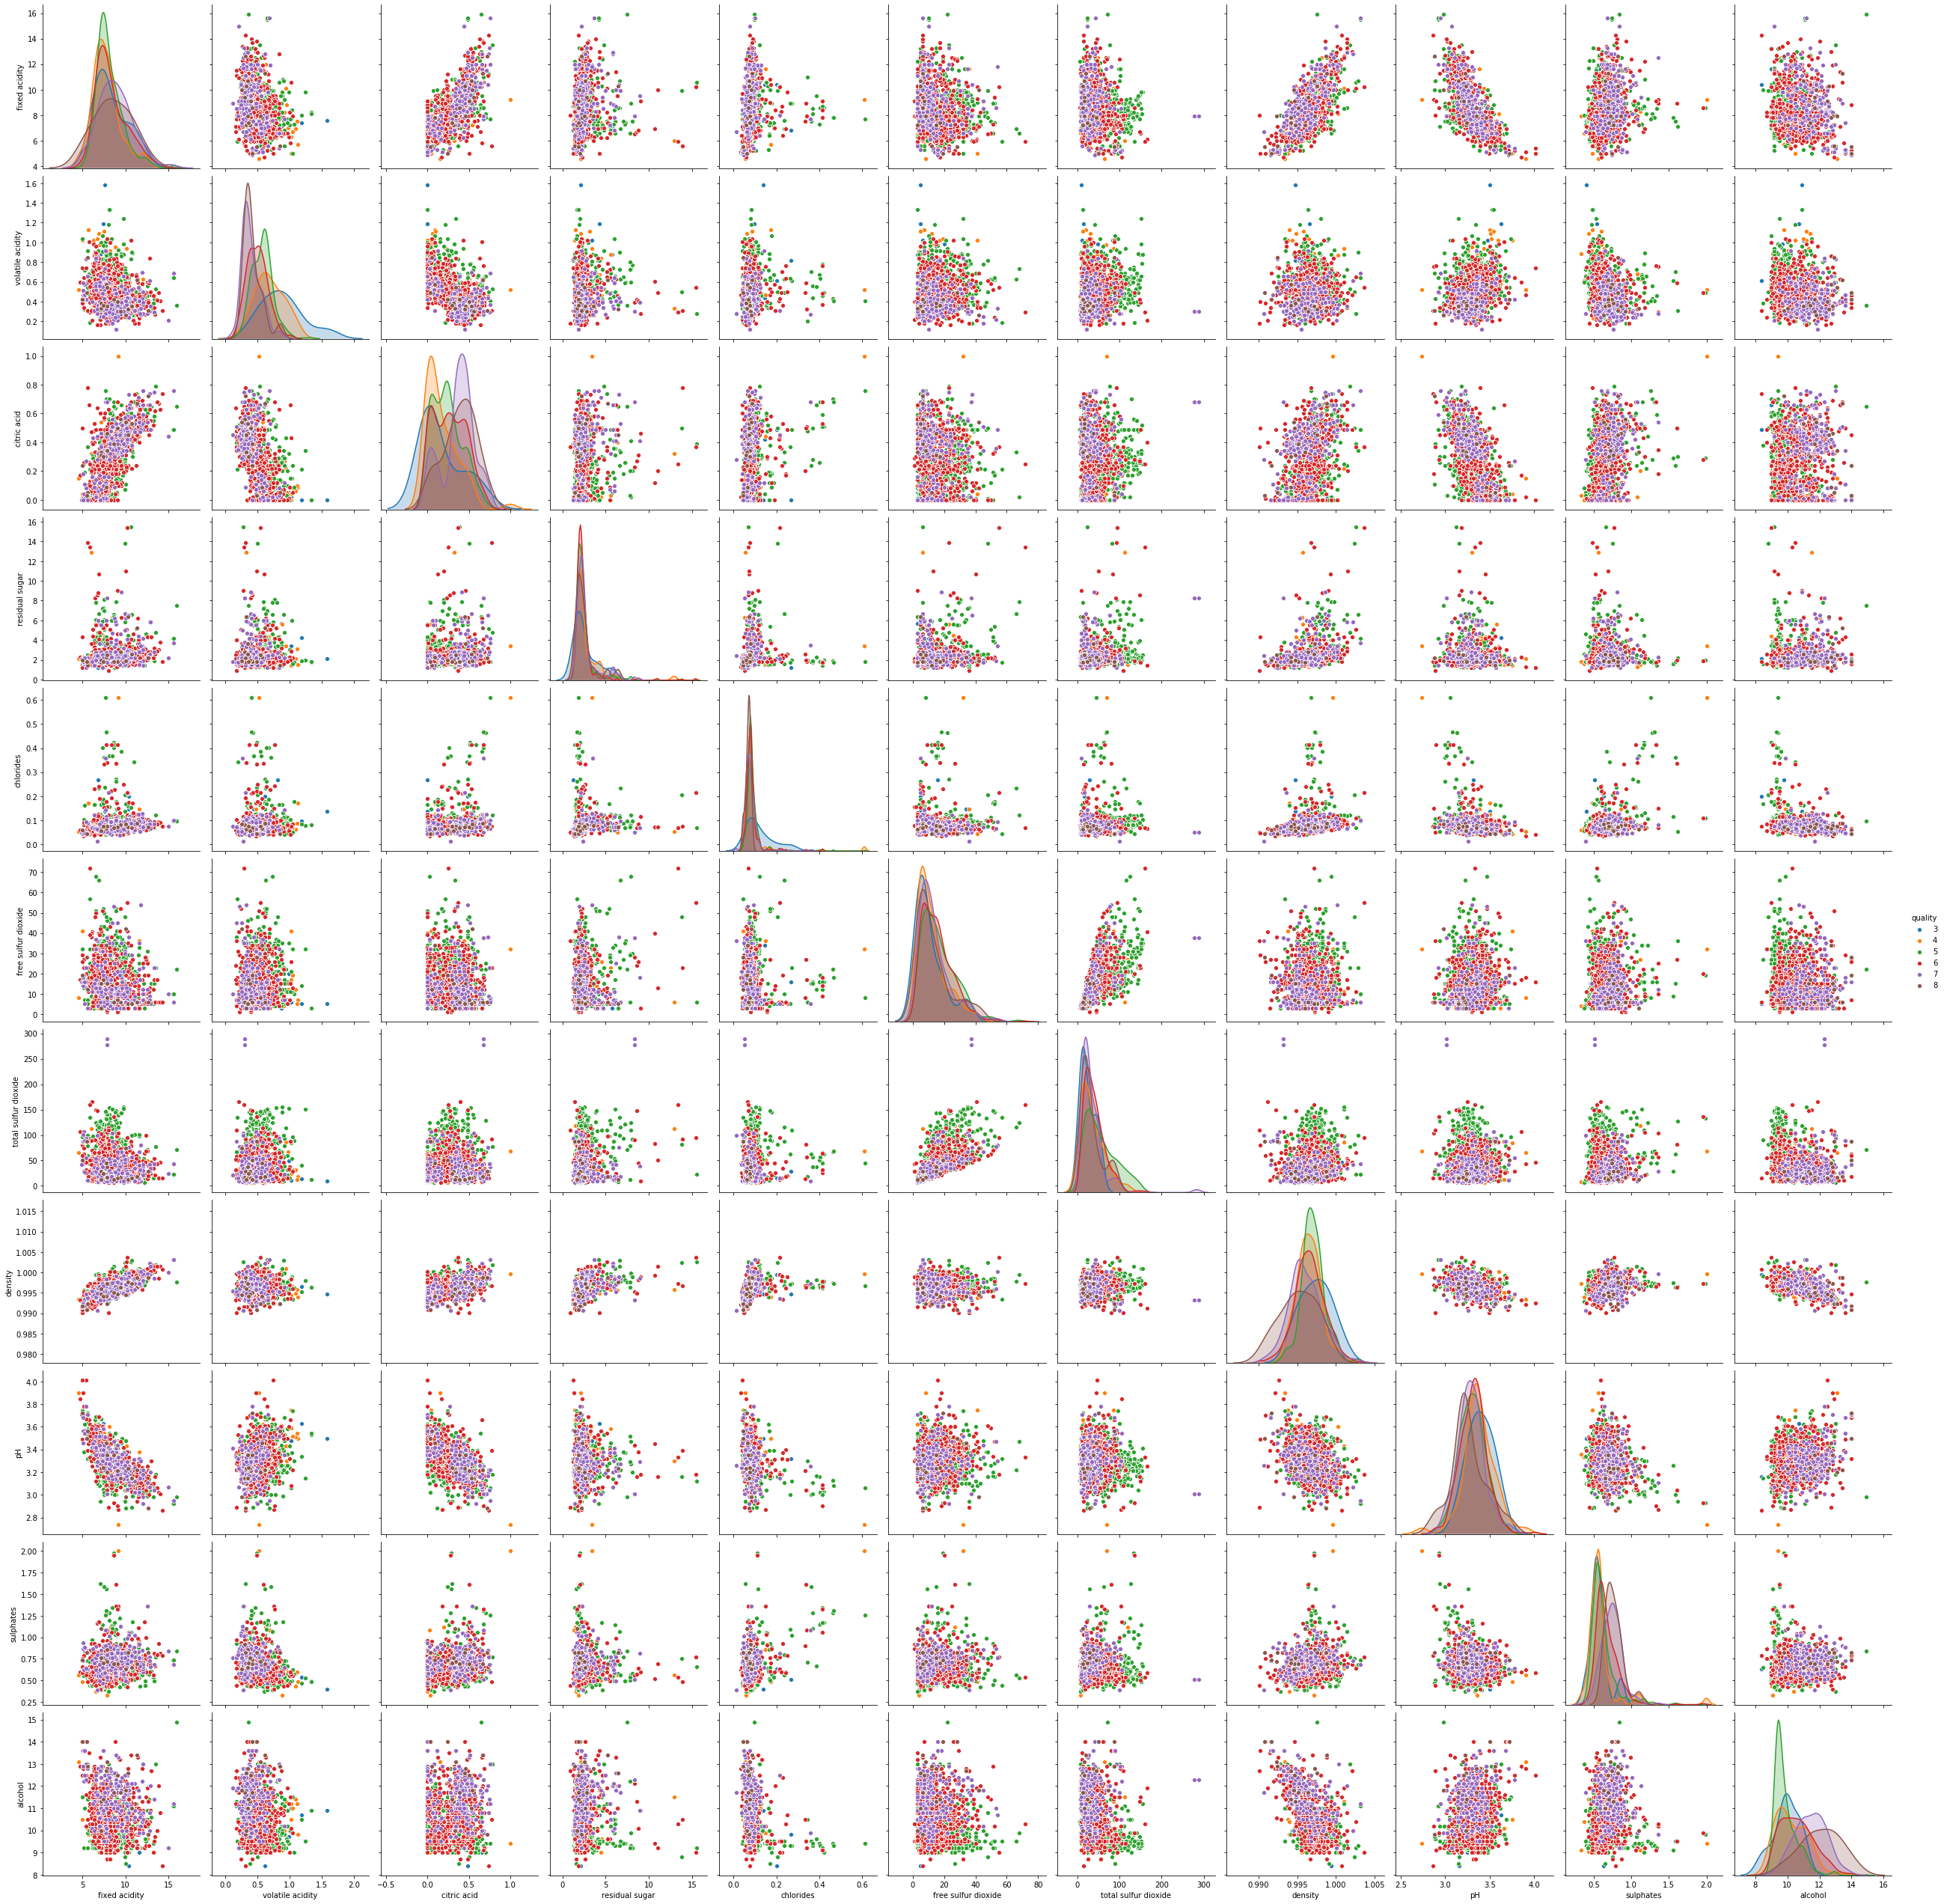

In [11]:
sns.pairplot(df,hue='quality',height=3.2)

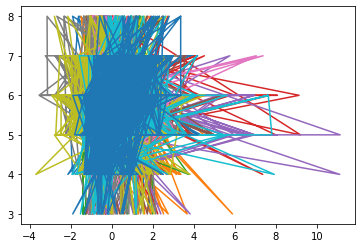

In [12]:
plt.plot(X,y)
plt.show()

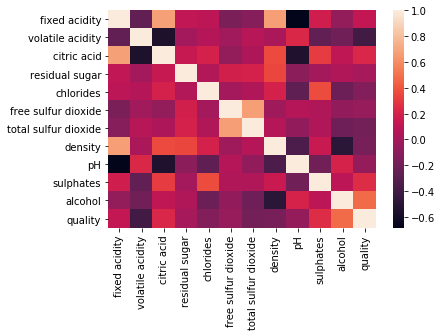

In [13]:
sns.heatmap(df.corr())

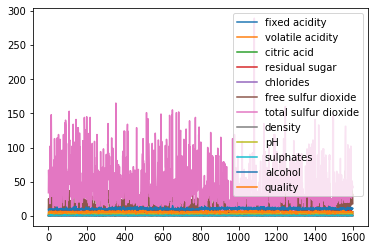

In [14]:
df.plot()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.85 , random_state=150)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
model.predict(X_test)

array([6, 5, 5, ..., 6, 6, 6], dtype=int64)

In [19]:
score = accuracy_score(y_test,model.predict(X_test))

In [20]:
from sklearn.model_selection import GridSearchCV


In [21]:
param_grid = {'C':[0.1,1,10,20,50,100,500,1000],'gamma':[1,0.01,0.1,1.5,2.5,0.001,0.89],'degree':range(1,10)}

In [22]:
grid = GridSearchCV(SVC(),param_grid,verbose=5)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
[CV] C=0.1, degree=1, gamma=1 ........................................
[CV] ............ C=0.1, degree=1, gamma=1, score=0.458, total=   0.0s
[CV] C=0.1, degree=1, gamma=1 ........................................
[CV] ............ C=0.1, degree=1, gamma=1, score=0.458, total=   0.0s
[CV] C=0.1, degree=1, gamma=1 ........................................
[CV] ............ C=0.1, degree=1, gamma=1, score=0.438, total=   0.0s
[CV] C=0.1, degree=1, gamma=1 ........................................
[CV] ............ C=0.1, degree=1, gamma=1, score=0.438, total=   0.0s
[CV] C=0.1, degree=1, gamma=1 ........................................
[CV] ............ C=0.1, degree=1, gamma=1, score=0.447, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.01 .....................................
[CV] ......... C=0.1, degree=1, gamma=0.01, score=0.458, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.01 .....................................
[CV] ........

C:\Users\Satya.Muralidhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, degree=1, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=1, gamma=2.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=1, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=1, gamma=2.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=1, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=1, gamma=2.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=1, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=1, gamma=2.5, score=0.447, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.001 ....................................
[CV] ........ C=0.1, degree=1, gamma=0.001, score=0.458, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.001 ....................................
[CV] ........ C=0.1, degree=1, gamma=0.001, score=0.458, total=   0.0s
[CV] C=0.1, degree=1, gamma=0.001 ....................................
[CV] ........ C=0.1, degree=1, gamma=0.001, score=0.438, total=   0.0s
[CV] 

[CV] .......... C=0.1, degree=3, gamma=0.1, score=0.447, total=   0.0s
[CV] C=0.1, degree=3, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=3, gamma=1.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=3, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=3, gamma=1.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=3, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=3, gamma=1.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=3, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=3, gamma=1.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=3, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=3, gamma=1.5, score=0.447, total=   0.0s
[CV] C=0.1, degree=3, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=3, gamma=2.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=3, gamma=2.5 ......................................
[CV] .

[CV] .......... C=0.1, degree=5, gamma=1.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=5, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=5, gamma=1.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=5, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=5, gamma=1.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=5, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=5, gamma=1.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=5, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=5, gamma=1.5, score=0.447, total=   0.0s
[CV] C=0.1, degree=5, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=5, gamma=2.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=5, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=5, gamma=2.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=5, gamma=2.5 ......................................
[CV] .

[CV] .......... C=0.1, degree=7, gamma=0.1, score=0.447, total=   0.0s
[CV] C=0.1, degree=7, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=7, gamma=1.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=7, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=7, gamma=1.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=7, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=7, gamma=1.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=7, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=7, gamma=1.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=7, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=7, gamma=1.5, score=0.447, total=   0.0s
[CV] C=0.1, degree=7, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=7, gamma=2.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=7, gamma=2.5 ......................................
[CV] .

[CV] .......... C=0.1, degree=9, gamma=1.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=9, gamma=1.5 ......................................
[CV] .......... C=0.1, degree=9, gamma=1.5, score=0.447, total=   0.0s
[CV] C=0.1, degree=9, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=9, gamma=2.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=9, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=9, gamma=2.5, score=0.458, total=   0.0s
[CV] C=0.1, degree=9, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=9, gamma=2.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=9, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=9, gamma=2.5, score=0.438, total=   0.0s
[CV] C=0.1, degree=9, gamma=2.5 ......................................
[CV] .......... C=0.1, degree=9, gamma=2.5, score=0.447, total=   0.0s
[CV] C=0.1, degree=9, gamma=0.001 ....................................
[CV] .

[CV] ............ C=1, degree=2, gamma=0.1, score=0.625, total=   0.0s
[CV] C=1, degree=2, gamma=0.1 ........................................
[CV] ............ C=1, degree=2, gamma=0.1, score=0.489, total=   0.0s
[CV] C=1, degree=2, gamma=1.5 ........................................
[CV] ............ C=1, degree=2, gamma=1.5, score=0.542, total=   0.0s
[CV] C=1, degree=2, gamma=1.5 ........................................
[CV] ............ C=1, degree=2, gamma=1.5, score=0.396, total=   0.0s
[CV] C=1, degree=2, gamma=1.5 ........................................
[CV] ............ C=1, degree=2, gamma=1.5, score=0.438, total=   0.0s
[CV] C=1, degree=2, gamma=1.5 ........................................
[CV] ............ C=1, degree=2, gamma=1.5, score=0.500, total=   0.0s
[CV] C=1, degree=2, gamma=1.5 ........................................
[CV] ............ C=1, degree=2, gamma=1.5, score=0.447, total=   0.0s
[CV] C=1, degree=2, gamma=2.5 ........................................
[CV] .

[CV] ............ C=1, degree=4, gamma=0.1, score=0.625, total=   0.0s
[CV] C=1, degree=4, gamma=0.1 ........................................
[CV] ............ C=1, degree=4, gamma=0.1, score=0.489, total=   0.0s
[CV] C=1, degree=4, gamma=1.5 ........................................
[CV] ............ C=1, degree=4, gamma=1.5, score=0.542, total=   0.0s
[CV] C=1, degree=4, gamma=1.5 ........................................
[CV] ............ C=1, degree=4, gamma=1.5, score=0.396, total=   0.0s
[CV] C=1, degree=4, gamma=1.5 ........................................
[CV] ............ C=1, degree=4, gamma=1.5, score=0.438, total=   0.0s
[CV] C=1, degree=4, gamma=1.5 ........................................
[CV] ............ C=1, degree=4, gamma=1.5, score=0.500, total=   0.0s
[CV] C=1, degree=4, gamma=1.5 ........................................
[CV] ............ C=1, degree=4, gamma=1.5, score=0.447, total=   0.0s
[CV] C=1, degree=4, gamma=2.5 ........................................
[CV] .

[CV] ............ C=1, degree=6, gamma=1.5, score=0.542, total=   0.0s
[CV] C=1, degree=6, gamma=1.5 ........................................
[CV] ............ C=1, degree=6, gamma=1.5, score=0.396, total=   0.0s
[CV] C=1, degree=6, gamma=1.5 ........................................
[CV] ............ C=1, degree=6, gamma=1.5, score=0.438, total=   0.0s
[CV] C=1, degree=6, gamma=1.5 ........................................
[CV] ............ C=1, degree=6, gamma=1.5, score=0.500, total=   0.0s
[CV] C=1, degree=6, gamma=1.5 ........................................
[CV] ............ C=1, degree=6, gamma=1.5, score=0.447, total=   0.0s
[CV] C=1, degree=6, gamma=2.5 ........................................
[CV] ............ C=1, degree=6, gamma=2.5, score=0.458, total=   0.0s
[CV] C=1, degree=6, gamma=2.5 ........................................
[CV] ............ C=1, degree=6, gamma=2.5, score=0.417, total=   0.0s
[CV] C=1, degree=6, gamma=2.5 ........................................
[CV] .

[CV] ............ C=1, degree=8, gamma=0.1, score=0.489, total=   0.0s
[CV] C=1, degree=8, gamma=1.5 ........................................
[CV] ............ C=1, degree=8, gamma=1.5, score=0.542, total=   0.0s
[CV] C=1, degree=8, gamma=1.5 ........................................
[CV] ............ C=1, degree=8, gamma=1.5, score=0.396, total=   0.0s
[CV] C=1, degree=8, gamma=1.5 ........................................
[CV] ............ C=1, degree=8, gamma=1.5, score=0.438, total=   0.0s
[CV] C=1, degree=8, gamma=1.5 ........................................
[CV] ............ C=1, degree=8, gamma=1.5, score=0.500, total=   0.0s
[CV] C=1, degree=8, gamma=1.5 ........................................
[CV] ............ C=1, degree=8, gamma=1.5, score=0.447, total=   0.0s
[CV] C=1, degree=8, gamma=2.5 ........................................
[CV] ............ C=1, degree=8, gamma=2.5, score=0.458, total=   0.0s
[CV] C=1, degree=8, gamma=2.5 ........................................
[CV] .

[CV] ........... C=10, degree=1, gamma=0.1, score=0.479, total=   0.0s
[CV] C=10, degree=1, gamma=0.1 .......................................
[CV] ........... C=10, degree=1, gamma=0.1, score=0.583, total=   0.0s
[CV] C=10, degree=1, gamma=0.1 .......................................
[CV] ........... C=10, degree=1, gamma=0.1, score=0.447, total=   0.0s
[CV] C=10, degree=1, gamma=1.5 .......................................
[CV] ........... C=10, degree=1, gamma=1.5, score=0.542, total=   0.0s
[CV] C=10, degree=1, gamma=1.5 .......................................
[CV] ........... C=10, degree=1, gamma=1.5, score=0.458, total=   0.0s
[CV] C=10, degree=1, gamma=1.5 .......................................
[CV] ........... C=10, degree=1, gamma=1.5, score=0.521, total=   0.0s
[CV] C=10, degree=1, gamma=1.5 .......................................
[CV] ........... C=10, degree=1, gamma=1.5, score=0.500, total=   0.0s
[CV] C=10, degree=1, gamma=1.5 .......................................
[CV] .

[CV] ............. C=10, degree=3, gamma=1, score=0.500, total=   0.0s
[CV] C=10, degree=3, gamma=1 .........................................
[CV] ............. C=10, degree=3, gamma=1, score=0.511, total=   0.0s
[CV] C=10, degree=3, gamma=0.01 ......................................
[CV] .......... C=10, degree=3, gamma=0.01, score=0.625, total=   0.0s
[CV] C=10, degree=3, gamma=0.01 ......................................
[CV] .......... C=10, degree=3, gamma=0.01, score=0.562, total=   0.0s
[CV] C=10, degree=3, gamma=0.01 ......................................
[CV] .......... C=10, degree=3, gamma=0.01, score=0.458, total=   0.0s
[CV] C=10, degree=3, gamma=0.01 ......................................
[CV] .......... C=10, degree=3, gamma=0.01, score=0.604, total=   0.0s
[CV] C=10, degree=3, gamma=0.01 ......................................
[CV] .......... C=10, degree=3, gamma=0.01, score=0.532, total=   0.0s
[CV] C=10, degree=3, gamma=0.1 .......................................
[CV] .

[CV] ............. C=10, degree=5, gamma=1, score=0.479, total=   0.0s
[CV] C=10, degree=5, gamma=1 .........................................
[CV] ............. C=10, degree=5, gamma=1, score=0.500, total=   0.0s
[CV] C=10, degree=5, gamma=1 .........................................
[CV] ............. C=10, degree=5, gamma=1, score=0.500, total=   0.0s
[CV] C=10, degree=5, gamma=1 .........................................
[CV] ............. C=10, degree=5, gamma=1, score=0.511, total=   0.0s
[CV] C=10, degree=5, gamma=0.01 ......................................
[CV] .......... C=10, degree=5, gamma=0.01, score=0.625, total=   0.0s
[CV] C=10, degree=5, gamma=0.01 ......................................
[CV] .......... C=10, degree=5, gamma=0.01, score=0.562, total=   0.0s
[CV] C=10, degree=5, gamma=0.01 ......................................
[CV] .......... C=10, degree=5, gamma=0.01, score=0.458, total=   0.0s
[CV] C=10, degree=5, gamma=0.01 ......................................
[CV] .

[CV] ........... C=10, degree=6, gamma=2.5, score=0.426, total=   0.0s
[CV] C=10, degree=6, gamma=0.001 .....................................
[CV] ......... C=10, degree=6, gamma=0.001, score=0.542, total=   0.0s
[CV] C=10, degree=6, gamma=0.001 .....................................
[CV] ......... C=10, degree=6, gamma=0.001, score=0.583, total=   0.0s
[CV] C=10, degree=6, gamma=0.001 .....................................
[CV] ......... C=10, degree=6, gamma=0.001, score=0.542, total=   0.0s
[CV] C=10, degree=6, gamma=0.001 .....................................
[CV] ......... C=10, degree=6, gamma=0.001, score=0.667, total=   0.0s
[CV] C=10, degree=6, gamma=0.001 .....................................
[CV] ......... C=10, degree=6, gamma=0.001, score=0.511, total=   0.0s
[CV] C=10, degree=6, gamma=0.89 ......................................
[CV] .......... C=10, degree=6, gamma=0.89, score=0.521, total=   0.0s
[CV] C=10, degree=6, gamma=0.89 ......................................
[CV] .

[CV] ........... C=10, degree=8, gamma=2.5, score=0.438, total=   0.0s
[CV] C=10, degree=8, gamma=2.5 .......................................
[CV] ........... C=10, degree=8, gamma=2.5, score=0.500, total=   0.0s
[CV] C=10, degree=8, gamma=2.5 .......................................
[CV] ........... C=10, degree=8, gamma=2.5, score=0.426, total=   0.0s
[CV] C=10, degree=8, gamma=0.001 .....................................
[CV] ......... C=10, degree=8, gamma=0.001, score=0.542, total=   0.0s
[CV] C=10, degree=8, gamma=0.001 .....................................
[CV] ......... C=10, degree=8, gamma=0.001, score=0.583, total=   0.0s
[CV] C=10, degree=8, gamma=0.001 .....................................
[CV] ......... C=10, degree=8, gamma=0.001, score=0.542, total=   0.0s
[CV] C=10, degree=8, gamma=0.001 .....................................
[CV] ......... C=10, degree=8, gamma=0.001, score=0.667, total=   0.0s
[CV] C=10, degree=8, gamma=0.001 .....................................
[CV] .

[CV] ........... C=20, degree=1, gamma=1.5, score=0.521, total=   0.0s
[CV] C=20, degree=1, gamma=1.5 .......................................
[CV] ........... C=20, degree=1, gamma=1.5, score=0.500, total=   0.0s
[CV] C=20, degree=1, gamma=1.5 .......................................
[CV] ........... C=20, degree=1, gamma=1.5, score=0.511, total=   0.0s
[CV] C=20, degree=1, gamma=2.5 .......................................
[CV] ........... C=20, degree=1, gamma=2.5, score=0.479, total=   0.0s
[CV] C=20, degree=1, gamma=2.5 .......................................
[CV] ........... C=20, degree=1, gamma=2.5, score=0.438, total=   0.0s
[CV] C=20, degree=1, gamma=2.5 .......................................
[CV] ........... C=20, degree=1, gamma=2.5, score=0.438, total=   0.0s
[CV] C=20, degree=1, gamma=2.5 .......................................
[CV] ........... C=20, degree=1, gamma=2.5, score=0.500, total=   0.0s
[CV] C=20, degree=1, gamma=2.5 .......................................
[CV] .

[CV] ........... C=20, degree=3, gamma=0.1, score=0.489, total=   0.0s
[CV] C=20, degree=3, gamma=1.5 .......................................
[CV] ........... C=20, degree=3, gamma=1.5, score=0.542, total=   0.0s
[CV] C=20, degree=3, gamma=1.5 .......................................
[CV] ........... C=20, degree=3, gamma=1.5, score=0.458, total=   0.0s
[CV] C=20, degree=3, gamma=1.5 .......................................
[CV] ........... C=20, degree=3, gamma=1.5, score=0.521, total=   0.0s
[CV] C=20, degree=3, gamma=1.5 .......................................
[CV] ........... C=20, degree=3, gamma=1.5, score=0.500, total=   0.0s
[CV] C=20, degree=3, gamma=1.5 .......................................
[CV] ........... C=20, degree=3, gamma=1.5, score=0.511, total=   0.0s
[CV] C=20, degree=3, gamma=2.5 .......................................
[CV] ........... C=20, degree=3, gamma=2.5, score=0.479, total=   0.0s
[CV] C=20, degree=3, gamma=2.5 .......................................
[CV] .

[CV] ........... C=20, degree=5, gamma=0.1, score=0.489, total=   0.0s
[CV] C=20, degree=5, gamma=1.5 .......................................
[CV] ........... C=20, degree=5, gamma=1.5, score=0.542, total=   0.0s
[CV] C=20, degree=5, gamma=1.5 .......................................
[CV] ........... C=20, degree=5, gamma=1.5, score=0.458, total=   0.0s
[CV] C=20, degree=5, gamma=1.5 .......................................
[CV] ........... C=20, degree=5, gamma=1.5, score=0.521, total=   0.0s
[CV] C=20, degree=5, gamma=1.5 .......................................
[CV] ........... C=20, degree=5, gamma=1.5, score=0.500, total=   0.0s
[CV] C=20, degree=5, gamma=1.5 .......................................
[CV] ........... C=20, degree=5, gamma=1.5, score=0.511, total=   0.0s
[CV] C=20, degree=5, gamma=2.5 .......................................
[CV] ........... C=20, degree=5, gamma=2.5, score=0.479, total=   0.0s
[CV] C=20, degree=5, gamma=2.5 .......................................
[CV] .

[CV] ........... C=20, degree=7, gamma=0.1, score=0.489, total=   0.0s
[CV] C=20, degree=7, gamma=1.5 .......................................
[CV] ........... C=20, degree=7, gamma=1.5, score=0.542, total=   0.0s
[CV] C=20, degree=7, gamma=1.5 .......................................
[CV] ........... C=20, degree=7, gamma=1.5, score=0.458, total=   0.0s
[CV] C=20, degree=7, gamma=1.5 .......................................
[CV] ........... C=20, degree=7, gamma=1.5, score=0.521, total=   0.0s
[CV] C=20, degree=7, gamma=1.5 .......................................
[CV] ........... C=20, degree=7, gamma=1.5, score=0.500, total=   0.0s
[CV] C=20, degree=7, gamma=1.5 .......................................
[CV] ........... C=20, degree=7, gamma=1.5, score=0.511, total=   0.0s
[CV] C=20, degree=7, gamma=2.5 .......................................
[CV] ........... C=20, degree=7, gamma=2.5, score=0.479, total=   0.0s
[CV] C=20, degree=7, gamma=2.5 .......................................
[CV] .

[CV] ........... C=20, degree=9, gamma=0.1, score=0.458, total=   0.0s
[CV] C=20, degree=9, gamma=0.1 .......................................
[CV] ........... C=20, degree=9, gamma=0.1, score=0.458, total=   0.0s
[CV] C=20, degree=9, gamma=0.1 .......................................
[CV] ........... C=20, degree=9, gamma=0.1, score=0.500, total=   0.0s
[CV] C=20, degree=9, gamma=0.1 .......................................
[CV] ........... C=20, degree=9, gamma=0.1, score=0.521, total=   0.0s
[CV] C=20, degree=9, gamma=0.1 .......................................
[CV] ........... C=20, degree=9, gamma=0.1, score=0.489, total=   0.0s
[CV] C=20, degree=9, gamma=1.5 .......................................
[CV] ........... C=20, degree=9, gamma=1.5, score=0.542, total=   0.0s
[CV] C=20, degree=9, gamma=1.5 .......................................
[CV] ........... C=20, degree=9, gamma=1.5, score=0.458, total=   0.0s
[CV] C=20, degree=9, gamma=1.5 .......................................
[CV] .

[CV] ............. C=50, degree=2, gamma=1, score=0.500, total=   0.0s
[CV] C=50, degree=2, gamma=1 .........................................
[CV] ............. C=50, degree=2, gamma=1, score=0.511, total=   0.0s
[CV] C=50, degree=2, gamma=0.01 ......................................
[CV] .......... C=50, degree=2, gamma=0.01, score=0.583, total=   0.0s
[CV] C=50, degree=2, gamma=0.01 ......................................
[CV] .......... C=50, degree=2, gamma=0.01, score=0.542, total=   0.0s
[CV] C=50, degree=2, gamma=0.01 ......................................
[CV] .......... C=50, degree=2, gamma=0.01, score=0.479, total=   0.0s
[CV] C=50, degree=2, gamma=0.01 ......................................
[CV] .......... C=50, degree=2, gamma=0.01, score=0.667, total=   0.0s
[CV] C=50, degree=2, gamma=0.01 ......................................
[CV] .......... C=50, degree=2, gamma=0.01, score=0.447, total=   0.0s
[CV] C=50, degree=2, gamma=0.1 .......................................
[CV] .

[CV] ......... C=50, degree=3, gamma=0.001, score=0.562, total=   0.0s
[CV] C=50, degree=3, gamma=0.001 .....................................
[CV] ......... C=50, degree=3, gamma=0.001, score=0.667, total=   0.0s
[CV] C=50, degree=3, gamma=0.001 .....................................
[CV] ......... C=50, degree=3, gamma=0.001, score=0.574, total=   0.0s
[CV] C=50, degree=3, gamma=0.89 ......................................
[CV] .......... C=50, degree=3, gamma=0.89, score=0.479, total=   0.0s
[CV] C=50, degree=3, gamma=0.89 ......................................
[CV] .......... C=50, degree=3, gamma=0.89, score=0.479, total=   0.0s
[CV] C=50, degree=3, gamma=0.89 ......................................
[CV] .......... C=50, degree=3, gamma=0.89, score=0.479, total=   0.0s
[CV] C=50, degree=3, gamma=0.89 ......................................
[CV] .......... C=50, degree=3, gamma=0.89, score=0.479, total=   0.0s
[CV] C=50, degree=3, gamma=0.89 ......................................
[CV] .

[CV] ........... C=50, degree=5, gamma=1.5, score=0.511, total=   0.0s
[CV] C=50, degree=5, gamma=2.5 .......................................
[CV] ........... C=50, degree=5, gamma=2.5, score=0.479, total=   0.0s
[CV] C=50, degree=5, gamma=2.5 .......................................
[CV] ........... C=50, degree=5, gamma=2.5, score=0.438, total=   0.0s
[CV] C=50, degree=5, gamma=2.5 .......................................
[CV] ........... C=50, degree=5, gamma=2.5, score=0.438, total=   0.0s
[CV] C=50, degree=5, gamma=2.5 .......................................
[CV] ........... C=50, degree=5, gamma=2.5, score=0.500, total=   0.0s
[CV] C=50, degree=5, gamma=2.5 .......................................
[CV] ........... C=50, degree=5, gamma=2.5, score=0.426, total=   0.0s
[CV] C=50, degree=5, gamma=0.001 .....................................
[CV] ......... C=50, degree=5, gamma=0.001, score=0.583, total=   0.0s
[CV] C=50, degree=5, gamma=0.001 .....................................
[CV] .

[CV] .......... C=50, degree=7, gamma=0.01, score=0.479, total=   0.0s
[CV] C=50, degree=7, gamma=0.01 ......................................
[CV] .......... C=50, degree=7, gamma=0.01, score=0.667, total=   0.0s
[CV] C=50, degree=7, gamma=0.01 ......................................
[CV] .......... C=50, degree=7, gamma=0.01, score=0.447, total=   0.0s
[CV] C=50, degree=7, gamma=0.1 .......................................
[CV] ........... C=50, degree=7, gamma=0.1, score=0.479, total=   0.0s
[CV] C=50, degree=7, gamma=0.1 .......................................
[CV] ........... C=50, degree=7, gamma=0.1, score=0.438, total=   0.0s
[CV] C=50, degree=7, gamma=0.1 .......................................
[CV] ........... C=50, degree=7, gamma=0.1, score=0.500, total=   0.0s
[CV] C=50, degree=7, gamma=0.1 .......................................
[CV] ........... C=50, degree=7, gamma=0.1, score=0.500, total=   0.0s
[CV] C=50, degree=7, gamma=0.1 .......................................
[CV] .

[CV] ............. C=50, degree=9, gamma=1, score=0.500, total=   0.0s
[CV] C=50, degree=9, gamma=1 .........................................
[CV] ............. C=50, degree=9, gamma=1, score=0.511, total=   0.0s
[CV] C=50, degree=9, gamma=0.01 ......................................
[CV] .......... C=50, degree=9, gamma=0.01, score=0.583, total=   0.0s
[CV] C=50, degree=9, gamma=0.01 ......................................
[CV] .......... C=50, degree=9, gamma=0.01, score=0.542, total=   0.0s
[CV] C=50, degree=9, gamma=0.01 ......................................
[CV] .......... C=50, degree=9, gamma=0.01, score=0.479, total=   0.0s
[CV] C=50, degree=9, gamma=0.01 ......................................
[CV] .......... C=50, degree=9, gamma=0.01, score=0.667, total=   0.0s
[CV] C=50, degree=9, gamma=0.01 ......................................
[CV] .......... C=50, degree=9, gamma=0.01, score=0.447, total=   0.0s
[CV] C=50, degree=9, gamma=0.1 .......................................
[CV] .

[CV] ......... C=100, degree=1, gamma=0.89, score=0.479, total=   0.0s
[CV] C=100, degree=1, gamma=0.89 .....................................
[CV] ......... C=100, degree=1, gamma=0.89, score=0.479, total=   0.0s
[CV] C=100, degree=1, gamma=0.89 .....................................
[CV] ......... C=100, degree=1, gamma=0.89, score=0.479, total=   0.0s
[CV] C=100, degree=1, gamma=0.89 .....................................
[CV] ......... C=100, degree=1, gamma=0.89, score=0.479, total=   0.0s
[CV] C=100, degree=1, gamma=0.89 .....................................
[CV] ......... C=100, degree=1, gamma=0.89, score=0.511, total=   0.0s
[CV] C=100, degree=2, gamma=1 ........................................
[CV] ............ C=100, degree=2, gamma=1, score=0.542, total=   0.0s
[CV] C=100, degree=2, gamma=1 ........................................
[CV] ............ C=100, degree=2, gamma=1, score=0.479, total=   0.0s
[CV] C=100, degree=2, gamma=1 ........................................
[CV] .

[CV] .......... C=100, degree=3, gamma=2.5, score=0.438, total=   0.0s
[CV] C=100, degree=3, gamma=2.5 ......................................
[CV] .......... C=100, degree=3, gamma=2.5, score=0.500, total=   0.0s
[CV] C=100, degree=3, gamma=2.5 ......................................
[CV] .......... C=100, degree=3, gamma=2.5, score=0.426, total=   0.0s
[CV] C=100, degree=3, gamma=0.001 ....................................
[CV] ........ C=100, degree=3, gamma=0.001, score=0.562, total=   0.0s
[CV] C=100, degree=3, gamma=0.001 ....................................
[CV] ........ C=100, degree=3, gamma=0.001, score=0.542, total=   0.0s
[CV] C=100, degree=3, gamma=0.001 ....................................
[CV] ........ C=100, degree=3, gamma=0.001, score=0.500, total=   0.0s
[CV] C=100, degree=3, gamma=0.001 ....................................
[CV] ........ C=100, degree=3, gamma=0.001, score=0.667, total=   0.0s
[CV] C=100, degree=3, gamma=0.001 ....................................
[CV] .

[CV] .......... C=100, degree=5, gamma=1.5, score=0.458, total=   0.0s
[CV] C=100, degree=5, gamma=1.5 ......................................
[CV] .......... C=100, degree=5, gamma=1.5, score=0.521, total=   0.0s
[CV] C=100, degree=5, gamma=1.5 ......................................
[CV] .......... C=100, degree=5, gamma=1.5, score=0.500, total=   0.0s
[CV] C=100, degree=5, gamma=1.5 ......................................
[CV] .......... C=100, degree=5, gamma=1.5, score=0.511, total=   0.0s
[CV] C=100, degree=5, gamma=2.5 ......................................
[CV] .......... C=100, degree=5, gamma=2.5, score=0.479, total=   0.0s
[CV] C=100, degree=5, gamma=2.5 ......................................
[CV] .......... C=100, degree=5, gamma=2.5, score=0.438, total=   0.0s
[CV] C=100, degree=5, gamma=2.5 ......................................
[CV] .......... C=100, degree=5, gamma=2.5, score=0.438, total=   0.0s
[CV] C=100, degree=5, gamma=2.5 ......................................
[CV] .

[CV] ......... C=100, degree=7, gamma=0.01, score=0.458, total=   0.0s
[CV] C=100, degree=7, gamma=0.01 .....................................
[CV] ......... C=100, degree=7, gamma=0.01, score=0.479, total=   0.0s
[CV] C=100, degree=7, gamma=0.01 .....................................
[CV] ......... C=100, degree=7, gamma=0.01, score=0.708, total=   0.0s
[CV] C=100, degree=7, gamma=0.01 .....................................
[CV] ......... C=100, degree=7, gamma=0.01, score=0.489, total=   0.0s
[CV] C=100, degree=7, gamma=0.1 ......................................
[CV] .......... C=100, degree=7, gamma=0.1, score=0.458, total=   0.0s
[CV] C=100, degree=7, gamma=0.1 ......................................
[CV] .......... C=100, degree=7, gamma=0.1, score=0.438, total=   0.0s
[CV] C=100, degree=7, gamma=0.1 ......................................
[CV] .......... C=100, degree=7, gamma=0.1, score=0.458, total=   0.0s
[CV] C=100, degree=7, gamma=0.1 ......................................
[CV] .

[CV] C=100, degree=8, gamma=0.89 .....................................
[CV] ......... C=100, degree=8, gamma=0.89, score=0.511, total=   0.0s
[CV] C=100, degree=9, gamma=1 ........................................
[CV] ............ C=100, degree=9, gamma=1, score=0.542, total=   0.0s
[CV] C=100, degree=9, gamma=1 ........................................
[CV] ............ C=100, degree=9, gamma=1, score=0.479, total=   0.0s
[CV] C=100, degree=9, gamma=1 ........................................
[CV] ............ C=100, degree=9, gamma=1, score=0.479, total=   0.0s
[CV] C=100, degree=9, gamma=1 ........................................
[CV] ............ C=100, degree=9, gamma=1, score=0.500, total=   0.0s
[CV] C=100, degree=9, gamma=1 ........................................
[CV] ............ C=100, degree=9, gamma=1, score=0.511, total=   0.0s
[CV] C=100, degree=9, gamma=0.01 .....................................
[CV] ......... C=100, degree=9, gamma=0.01, score=0.562, total=   0.0s
[CV] C

[CV] .......... C=500, degree=1, gamma=2.5, score=0.438, total=   0.0s
[CV] C=500, degree=1, gamma=2.5 ......................................
[CV] .......... C=500, degree=1, gamma=2.5, score=0.500, total=   0.0s
[CV] C=500, degree=1, gamma=2.5 ......................................
[CV] .......... C=500, degree=1, gamma=2.5, score=0.426, total=   0.0s
[CV] C=500, degree=1, gamma=0.001 ....................................
[CV] ........ C=500, degree=1, gamma=0.001, score=0.583, total=   0.0s
[CV] C=500, degree=1, gamma=0.001 ....................................
[CV] ........ C=500, degree=1, gamma=0.001, score=0.604, total=   0.0s
[CV] C=500, degree=1, gamma=0.001 ....................................
[CV] ........ C=500, degree=1, gamma=0.001, score=0.500, total=   0.0s
[CV] C=500, degree=1, gamma=0.001 ....................................
[CV] ........ C=500, degree=1, gamma=0.001, score=0.604, total=   0.0s
[CV] C=500, degree=1, gamma=0.001 ....................................
[CV] .

[CV] .......... C=500, degree=3, gamma=0.1, score=0.479, total=   0.0s
[CV] C=500, degree=3, gamma=0.1 ......................................
[CV] .......... C=500, degree=3, gamma=0.1, score=0.396, total=   0.0s
[CV] C=500, degree=3, gamma=0.1 ......................................
[CV] .......... C=500, degree=3, gamma=0.1, score=0.500, total=   0.0s
[CV] C=500, degree=3, gamma=0.1 ......................................
[CV] .......... C=500, degree=3, gamma=0.1, score=0.511, total=   0.0s
[CV] C=500, degree=3, gamma=1.5 ......................................
[CV] .......... C=500, degree=3, gamma=1.5, score=0.542, total=   0.0s
[CV] C=500, degree=3, gamma=1.5 ......................................
[CV] .......... C=500, degree=3, gamma=1.5, score=0.458, total=   0.0s
[CV] C=500, degree=3, gamma=1.5 ......................................
[CV] .......... C=500, degree=3, gamma=1.5, score=0.521, total=   0.0s
[CV] C=500, degree=3, gamma=1.5 ......................................
[CV] .

[CV] ......... C=500, degree=5, gamma=0.01, score=0.500, total=   0.0s
[CV] C=500, degree=5, gamma=0.01 .....................................
[CV] ......... C=500, degree=5, gamma=0.01, score=0.521, total=   0.0s
[CV] C=500, degree=5, gamma=0.01 .....................................
[CV] ......... C=500, degree=5, gamma=0.01, score=0.542, total=   0.0s
[CV] C=500, degree=5, gamma=0.01 .....................................
[CV] ......... C=500, degree=5, gamma=0.01, score=0.604, total=   0.0s
[CV] C=500, degree=5, gamma=0.01 .....................................
[CV] ......... C=500, degree=5, gamma=0.01, score=0.383, total=   0.0s
[CV] C=500, degree=5, gamma=0.1 ......................................
[CV] .......... C=500, degree=5, gamma=0.1, score=0.458, total=   0.0s
[CV] C=500, degree=5, gamma=0.1 ......................................
[CV] .......... C=500, degree=5, gamma=0.1, score=0.479, total=   0.0s
[CV] C=500, degree=5, gamma=0.1 ......................................
[CV] .

[CV] ........ C=500, degree=6, gamma=0.001, score=0.604, total=   0.0s
[CV] C=500, degree=6, gamma=0.001 ....................................
[CV] ........ C=500, degree=6, gamma=0.001, score=0.553, total=   0.0s
[CV] C=500, degree=6, gamma=0.89 .....................................
[CV] ......... C=500, degree=6, gamma=0.89, score=0.479, total=   0.0s
[CV] C=500, degree=6, gamma=0.89 .....................................
[CV] ......... C=500, degree=6, gamma=0.89, score=0.479, total=   0.0s
[CV] C=500, degree=6, gamma=0.89 .....................................
[CV] ......... C=500, degree=6, gamma=0.89, score=0.479, total=   0.0s
[CV] C=500, degree=6, gamma=0.89 .....................................
[CV] ......... C=500, degree=6, gamma=0.89, score=0.479, total=   0.0s
[CV] C=500, degree=6, gamma=0.89 .....................................
[CV] ......... C=500, degree=6, gamma=0.89, score=0.511, total=   0.0s
[CV] C=500, degree=7, gamma=1 ........................................
[CV] .

[CV] .......... C=500, degree=8, gamma=1.5, score=0.458, total=   0.0s
[CV] C=500, degree=8, gamma=1.5 ......................................
[CV] .......... C=500, degree=8, gamma=1.5, score=0.521, total=   0.0s
[CV] C=500, degree=8, gamma=1.5 ......................................
[CV] .......... C=500, degree=8, gamma=1.5, score=0.500, total=   0.0s
[CV] C=500, degree=8, gamma=1.5 ......................................
[CV] .......... C=500, degree=8, gamma=1.5, score=0.511, total=   0.0s
[CV] C=500, degree=8, gamma=2.5 ......................................
[CV] .......... C=500, degree=8, gamma=2.5, score=0.479, total=   0.0s
[CV] C=500, degree=8, gamma=2.5 ......................................
[CV] .......... C=500, degree=8, gamma=2.5, score=0.438, total=   0.0s
[CV] C=500, degree=8, gamma=2.5 ......................................
[CV] .......... C=500, degree=8, gamma=2.5, score=0.438, total=   0.0s
[CV] C=500, degree=8, gamma=2.5 ......................................
[CV] .

[CV] ........... C=1000, degree=1, gamma=1, score=0.511, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01 ....................................
[CV] ........ C=1000, degree=1, gamma=0.01, score=0.521, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01 ....................................
[CV] ........ C=1000, degree=1, gamma=0.01, score=0.479, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01 ....................................
[CV] ........ C=1000, degree=1, gamma=0.01, score=0.521, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01 ....................................
[CV] ........ C=1000, degree=1, gamma=0.01, score=0.562, total=   0.0s
[CV] C=1000, degree=1, gamma=0.01 ....................................
[CV] ........ C=1000, degree=1, gamma=0.01, score=0.404, total=   0.0s
[CV] C=1000, degree=1, gamma=0.1 .....................................
[CV] ......... C=1000, degree=1, gamma=0.1, score=0.500, total=   0.0s
[CV] C=1000, degree=1, gamma=0.1 .....................................
[CV] .

[CV] ........ C=1000, degree=2, gamma=0.89, score=0.511, total=   0.0s
[CV] C=1000, degree=3, gamma=1 .......................................
[CV] ........... C=1000, degree=3, gamma=1, score=0.542, total=   0.0s
[CV] C=1000, degree=3, gamma=1 .......................................
[CV] ........... C=1000, degree=3, gamma=1, score=0.479, total=   0.0s
[CV] C=1000, degree=3, gamma=1 .......................................
[CV] ........... C=1000, degree=3, gamma=1, score=0.479, total=   0.0s
[CV] C=1000, degree=3, gamma=1 .......................................
[CV] ........... C=1000, degree=3, gamma=1, score=0.500, total=   0.0s
[CV] C=1000, degree=3, gamma=1 .......................................
[CV] ........... C=1000, degree=3, gamma=1, score=0.511, total=   0.0s
[CV] C=1000, degree=3, gamma=0.01 ....................................
[CV] ........ C=1000, degree=3, gamma=0.01, score=0.521, total=   0.0s
[CV] C=1000, degree=3, gamma=0.01 ....................................
[CV] .

[CV] C=1000, degree=4, gamma=0.89 ....................................
[CV] ........ C=1000, degree=4, gamma=0.89, score=0.479, total=   0.0s
[CV] C=1000, degree=4, gamma=0.89 ....................................
[CV] ........ C=1000, degree=4, gamma=0.89, score=0.479, total=   0.0s
[CV] C=1000, degree=4, gamma=0.89 ....................................
[CV] ........ C=1000, degree=4, gamma=0.89, score=0.479, total=   0.0s
[CV] C=1000, degree=4, gamma=0.89 ....................................
[CV] ........ C=1000, degree=4, gamma=0.89, score=0.511, total=   0.0s
[CV] C=1000, degree=5, gamma=1 .......................................
[CV] ........... C=1000, degree=5, gamma=1, score=0.542, total=   0.0s
[CV] C=1000, degree=5, gamma=1 .......................................
[CV] ........... C=1000, degree=5, gamma=1, score=0.479, total=   0.0s
[CV] C=1000, degree=5, gamma=1 .......................................
[CV] ........... C=1000, degree=5, gamma=1, score=0.479, total=   0.0s
[CV] C

[CV] ......... C=1000, degree=6, gamma=2.5, score=0.426, total=   0.0s
[CV] C=1000, degree=6, gamma=0.001 ...................................
[CV] ....... C=1000, degree=6, gamma=0.001, score=0.604, total=   0.0s
[CV] C=1000, degree=6, gamma=0.001 ...................................
[CV] ....... C=1000, degree=6, gamma=0.001, score=0.521, total=   0.0s
[CV] C=1000, degree=6, gamma=0.001 ...................................
[CV] ....... C=1000, degree=6, gamma=0.001, score=0.521, total=   0.0s
[CV] C=1000, degree=6, gamma=0.001 ...................................
[CV] ....... C=1000, degree=6, gamma=0.001, score=0.646, total=   0.0s
[CV] C=1000, degree=6, gamma=0.001 ...................................
[CV] ....... C=1000, degree=6, gamma=0.001, score=0.553, total=   0.0s
[CV] C=1000, degree=6, gamma=0.89 ....................................
[CV] ........ C=1000, degree=6, gamma=0.89, score=0.479, total=   0.0s
[CV] C=1000, degree=6, gamma=0.89 ....................................
[CV] .

[CV] ......... C=1000, degree=8, gamma=1.5, score=0.511, total=   0.0s
[CV] C=1000, degree=8, gamma=2.5 .....................................
[CV] ......... C=1000, degree=8, gamma=2.5, score=0.479, total=   0.0s
[CV] C=1000, degree=8, gamma=2.5 .....................................
[CV] ......... C=1000, degree=8, gamma=2.5, score=0.438, total=   0.0s
[CV] C=1000, degree=8, gamma=2.5 .....................................
[CV] ......... C=1000, degree=8, gamma=2.5, score=0.438, total=   0.0s
[CV] C=1000, degree=8, gamma=2.5 .....................................
[CV] ......... C=1000, degree=8, gamma=2.5, score=0.500, total=   0.0s
[CV] C=1000, degree=8, gamma=2.5 .....................................
[CV] ......... C=1000, degree=8, gamma=2.5, score=0.426, total=   0.0s
[CV] C=1000, degree=8, gamma=0.001 ...................................
[CV] ....... C=1000, degree=8, gamma=0.001, score=0.604, total=   0.0s
[CV] C=1000, degree=8, gamma=0.001 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   38.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 20, 50, 100, 500, 1000],
                         'degree': range(1, 10),
                         'gamma': [1, 0.01, 0.1, 1.5, 2.5, 0.001, 0.89]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [24]:
grid.best_params_

{'C': 20, 'degree': 1, 'gamma': 0.001}

In [25]:
model_new = SVC(C=1,degree=6,gamma=0.1)
model_new.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=6, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
model_new.predict(X_test)

array([6, 5, 5, ..., 6, 6, 6], dtype=int64)

In [27]:
score2 = accuracy_score(y_test,model_new.predict(X_test))
score2

0.5948529411764706